# Green's function of an atomic chain

This example demonstrates a computation of the retarded Green's function function of an atomic chain. The chain consists of identical atoms of an abstract chemical element, say an element "A".

In [1]:
    import sys
    import numpy as np
    import matplotlib.pyplot as plt
    import tb
    import negf
    
    xyz_file = """1
    H cell
    A1       0.0000000000    0.0000000000    0.0000000000                                                                                                      
    """
    
    a = tb.Orbitals('A')

 _   _                   _   _      _   
| \ | | __ _ _ __   ___ | \ | | ___| |_ 
|  \| |/ _` | '_ \ / _ \|  \| |/ _ \ __|
| |\  | (_| | | | | (_) | |\  |  __/ |_ 
|_| \_|\__,_|_| |_|\___/|_| \_|\___|\__|
                                        



Let us assume each atomic site has one s-type orbital and the energy level of -0.7 eV. The coupling matrix element equals -0.5 eV. 

In [2]:
    a.add_orbital('s', -0.7)
    tb.Orbitals.orbital_sets = {'A': a}
    tb.set_tb_params(PARAMS_A_A={'ss_sigma': -0.5})

With all these parameters we can create an instance of the class Hamiltonian. The distance between nearest neighbours is set to 1.1 A.

In [3]:
    h = tb.Hamiltonian(xyz=xyz_file, nn_distance=1.1).initialize()

The verbosity level is 2
The radius of the neighbourhood is 1.1 Ang

---------------------------------

The xyz-file:
 1
H cell
A1       0.0000000000    0.0000000000    0.0000000000                                                                                                      

---------------------------------

Basis set 
 Num of species {'A': 1} 


 A 
title | energy | n | l | m | s
------+--------+---+---+---+--
s     | -0.7   | 0 | 0 | 0 | 0
------+--------+---+---+---+--
 
---------------------------------

Radial dependence function: None

---------------------------------

Discrete radial dependence function: None

---------------------------------

Unique distances: 
    
---------------------------------



Now we need to set periodic boundary conditions with a one-dimensional unit cell and lattice constant of 1 A. 

In [4]:
    h.set_periodic_bc([[0, 0, 1.0]])

Primitive_cell_vectors: 
 [[0, 0, 1.0]] 

---------------------------------



In [5]:

    h_l, h_0, h_r = h.get_hamiltonians()

    energy = np.linspace(-3.5, 2.0, 500)

    sgf_l = []
    sgf_r = []

    for E in energy:
        L, R = negf.surface_greens_function(E, h_l, h_0, h_r)
        sgf_l.append(L)
        sgf_r.append(R)

    sgf_l = np.array(sgf_l)
    sgf_r = np.array(sgf_r)

    num_sites = h_0.shape[0]
    gf = np.linalg.pinv(np.multiply.outer(energy+0.001j, np.identity(num_sites)) - h_0 - sgf_l - sgf_r)

    dos = -np.trace(np.imag(gf), axis1=1, axis2=2)

    tr = np.zeros((energy.shape[0]), dtype=np.complex)

    for j, E in enumerate(energy):
        gf0 = np.matrix(gf[j, :, :])
        gamma_l = 1j * (np.matrix(sgf_l[j, :, :]) - np.matrix(sgf_l[j, :, :]).H)
        gamma_r = 1j * (np.matrix(sgf_r[j, :, :]) - np.matrix(sgf_r[j, :, :]).H)
        tr[j] = np.real(np.trace(gamma_l * gf0 * gamma_r * gf0.H))
        dos[j] = np.real(np.trace(1j * (gf0 - gf0.H)))
   

/home/mk/TB_project/tb_env3/lib/python3.6/site-packages/tb/diatomic_matrix_element.py:115: RuntimeWarning: divide by zero encountered in double_scalars
  prefactor = ((0.5 * (1 + N)) ** l) * (((1 - N) / (1 + N)) ** (m1 * 0.5 - m2 * 0.5)) * \
/home/mk/TB_project/tb_env3/lib/python3.6/site-packages/tb/diatomic_matrix_element.py:123: RuntimeWarning: divide by zero encountered in double_scalars
  ans += ((-1) ** t) * (((1 - N) / (1 + N)) ** t) / \


/home/mk/TB_project/tb_env3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


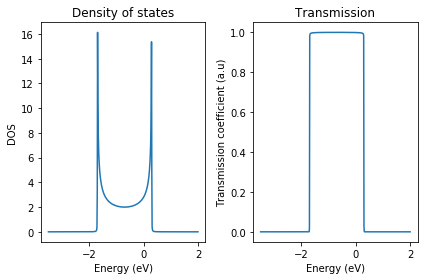

In [6]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(energy, dos)
ax[0].set_xlabel('Energy (eV)')
ax[0].set_ylabel('DOS')
ax[0].set_title('Density of states')

ax[1].plot(energy, tr)
ax[1].set_xlabel('Energy (eV)')
ax[1].set_ylabel('Transmission coefficient (a.u)')
ax[1].set_title('Transmission')
fig.tight_layout()
plt.show()

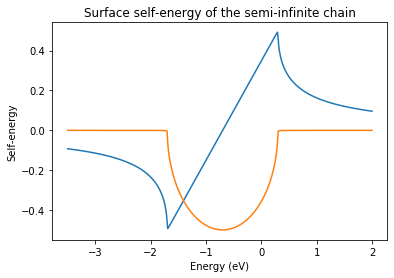

In [7]:
ax = plt.axes()
ax.set_title('Surface self-energy of the semi-infinite chain')
ax.plot(energy, np.real(np.squeeze(sgf_l)))
ax.plot(energy, np.imag(np.squeeze(sgf_l)))
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Self-energy')
plt.show()